## Image Classification with Deep Learning 

### Introduction
For our practical session, we are going to inplement on of the most common computer vision tasks- image classification. We will use the CIFAR-10 dataset. The CIFAR-10 dataset is a widely used collection of 60,000 small, 32x32 color images divided into 10 distinct object classes (like airplanes, cats, cars, dogs, ships, trucks) for training and testing computer vision models, with 50,000 images for training and 10,000 for testing, serving as a benchmark for algorithm performance in machine learning. 

For this task we will need to also install a new librarry called keras.So go ahead and run 
```pip install --upgrade keras``` on your terminal.


In [39]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### 1. Load & Explore the Data

In [40]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


Let us confirm that the data looks correct and inspect a couple of images...

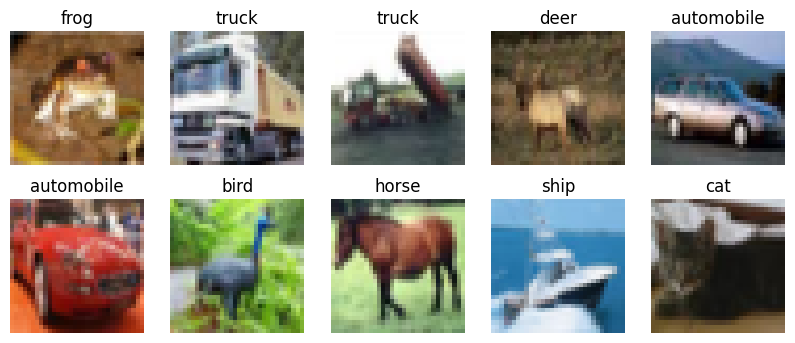

In [41]:
# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Display some sample images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

### 2. Image Pre-processing

**2.1 Normalization**

Remember, our images are represented as a grid of pixel values. Pixel values can range from between 0-255. If the input pixel values are large and widely varied, it means the network will have very large gradients and may not converge. So we normalize to limit shrink the pixel values between 0 and 1

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Other pre-processing steps typical in computer vision is image augmentation. Here, you can flip images, rotate them, adjust their contrast, edge detection and so much more. But for this dataset, we have enough training samples, and we want to see the model performance first, then we can come back to make the decision on whether augmentation is actually necessary.

Explore the open CV library for methods used in image augmentation...

### 3. Model Building & Training

In [21]:
fcnn = Sequential()

#flattened input layer
fcnn.add(Flatten(input_shape=(32,32,3)))

#hidden layers
fcnn.add(Dense(1024, activation='relu'))
fcnn.add(Dense(512, activation='relu'))
fcnn.add(Dense(256, activation='relu'))

#output layer
fcnn.add(Dense(10, activation='softmax'))
print("Added Dense Output Layer (10 neurons, Softmax activation)")

# Display the model architecture summary
fcnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
fcnn.summary()

Added Dense Output Layer (10 neurons, Softmax activation)


d:\Advanced_Machine_Learning\adml-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model
history = fcnn.fit(
    X_train, y_train,
    batch_size=52,
    epochs=5,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3309 - loss: 1.8789 - val_accuracy: 0.3625 - val_loss: 1.7777
Epoch 2/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4016 - loss: 1.6894 - val_accuracy: 0.4055 - val_loss: 1.6847
Epoch 3/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.4332 - loss: 1.6055 - val_accuracy: 0.4419 - val_loss: 1.5713
Epoch 4/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.4536 - loss: 1.5473 - val_accuracy: 0.4259 - val_loss: 1.6316
Epoch 5/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4677 - loss: 1.5023 - val_accuracy: 0.4681 - val_loss: 1.4987


Determining the appropriate number of epoch
Plot the training accuracy against the no. of epochs

In [ ]:
#Model performance of the FCNN
loss, accuracy = fcnn.evaluate(X_test, y_test, verbose=0)

print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")


Final Test Loss: 1.4987
Final Test Accuracy: 0.4681


In [27]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

d:\Advanced_Machine_Learning\adml-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Conv2D layer (Convolutional layer)**

- 32 filters → the layer will learn 32 different feature maps (like edges, textures).
(3,3) 
- kernel size → small 3x3 sliding window for detecting features.
- Activation='relu' → introduces non-linearity and helps the network learn complex patterns.
- input_shape=(32,32,3) → input images are 32x32 pixels with 3 color channels (RGB).

**Max Pooling layer**

Reduces the spatial size of feature maps by taking the maximum value in each 2x2 window.Helps reduce computation and adds translation invariance.After this, feature maps become smaller (half the height and width).

**Dense (fully connected) layer**

- 64 neurons, ReLU activation.Learns complex combinations of features extracted by convolutional layers.

**Output layer**

- 10 neurons → one for each CIFAR-10 class.
- Softmax activation → converts outputs into probabilities that sum to 1.The class with the highest probability is the model’s prediction.

In [28]:
history = model.fit(
    X_train, y_train,
    batch_size=52,
    epochs=5,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.2043 - loss: 2.1297 - val_accuracy: 0.2952 - val_loss: 1.9348
Epoch 2/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.3389 - loss: 1.8304 - val_accuracy: 0.3844 - val_loss: 1.7158
Epoch 3/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.4119 - loss: 1.6304 - val_accuracy: 0.4292 - val_loss: 1.5641
Epoch 4/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.4606 - loss: 1.5002 - val_accuracy: 0.4652 - val_loss: 1.4719
Epoch 5/5
962/962 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4961 - loss: 1.4066 - val_accuracy: 0.4903 - val_loss: 1.4184


In [29]:
#Model performance of the CNN
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")


Final Test Loss: 1.4184
Final Test Accuracy: 0.4903


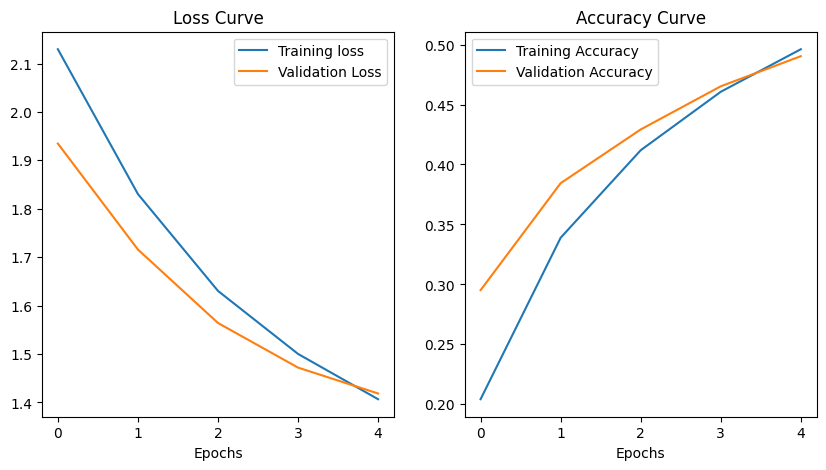

In [32]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(train_loss,label='Training loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(122)
plt.plot(train_accuracy,label='Training Accuracy')
plt.plot(val_accuracy,label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.legend()


In [34]:
model.save('cnn_model.keras')
from tensorflow.keras.models import load_model
trained_fcn_model=load_model('cnn_model.keras')
trained_fcn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,572 (478.80 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### 4. Hyperparameter Tuning using Keras tuner

### 5. Model Evaluation on Tuned model

### 6. Predictions

In [36]:
# Make predictions on some test images
predictions = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


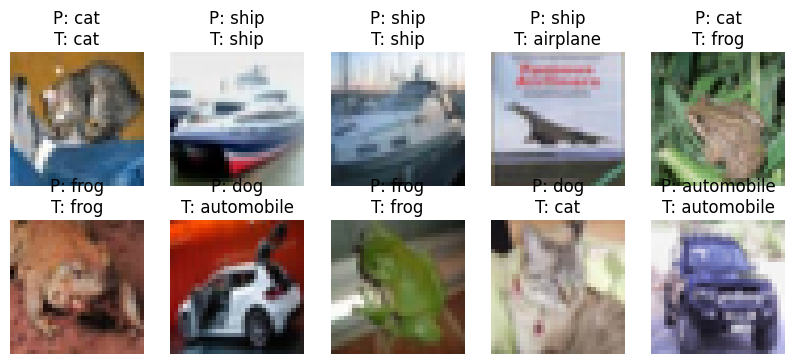

In [38]:
# Display test images with predicted labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    plt.title(f"P: {pred_label}\nT: {true_label}")
    plt.axis('off')
plt.show()